# 深度学习入门-基于Python的理论与实现

## 感知机

感知机接收多个输入信号，输出一个信号。

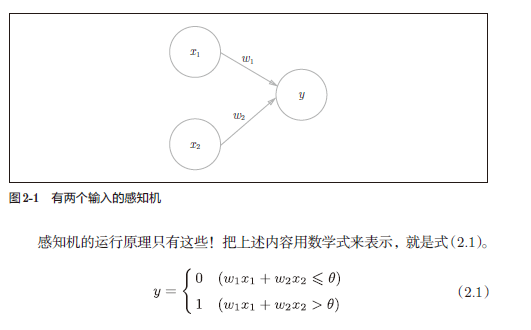

x1、x2 是输入信号，y 是输出信号，w1、w2 是权重。输入信号被送往神经元时，会被分别乘以固定的权重。神经元会计算传送过来的信号的总和，只有当这个总和超过了阈值θ时，才会输出1。这也称为“神经元被激活” 。

## 简单逻辑电路 

公式2.1 简单的实现

与门的实现

In [1]:
import numpy as np

def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

print AND(0, 0)#0
print AND(1, 0)#0
print AND(0, 1)#0
print AND(1, 1)#1

0
0
0
1


导入权重和偏置
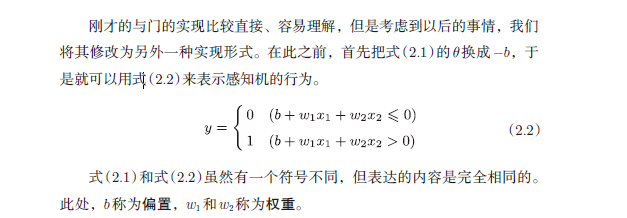

与门的新实现

In [2]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print AND(0, 0)#0
print AND(1, 0)#0
print AND(0, 1)#0
print AND(1, 1)#1


0
0
0
1


与非门和或门的实现：与门、与非门、或门是具有相同构造的感知机，区别只在于权重参数的值。因此，在与非门和或门的实现中，仅设置权重和偏置的值这一点和与门的实现不同。

In [4]:
import numpy as np

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # 仅权重和偏置与AND不同！
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # 仅权重和偏置与AND不同！
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print NAND(0, 0)
print NAND(1, 0)
print NAND(0, 1)
print NAND(1, 1)   

print OR(0, 0)
print OR(1, 0)
print OR(0, 1)
print OR(1, 1)  

1
1
1
0
0
1
1
1


异或门

前面介绍的感知机是无法实现这个异或门的。为什么用感知机可以实现与门、或门，却无法实现异或门呢？下面我们尝试通过画图来思考其中的原因。

感知机的值分布
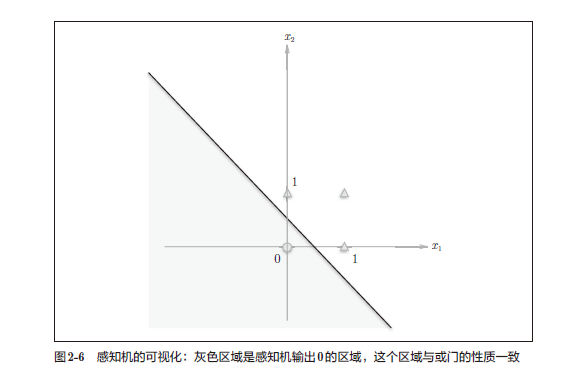

感知机会生成由直线， 分割开的两个空间。其中一个空间输出1，另一个空间输出0。

异或门的值分布
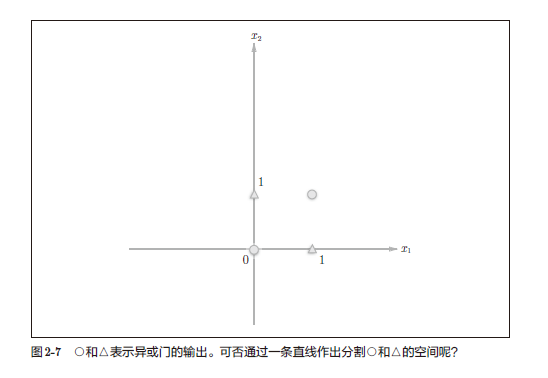

想要用一条直线将图2-7 中的○和△分开，无论如何都做不到。

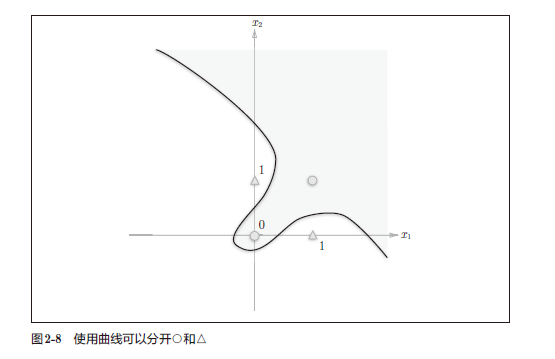

感知机的局限性就在于它只能表示由一条直线分割的空间。图2-8这样弯曲的曲线无法用感知机表示。另外，由图2-8这样的曲线分割而成的空间称为非线性空间，由直线分割而成的空间称为线性空间。

感知机不能表示异或门让人深感遗憾，但也无需悲观。实际上，感知机的绝妙之处在于它可以“叠加层”。接下来，我们将看到通过组合感知机（叠加层）就可以实现异或门。


与门，与非门，或门的符号表示
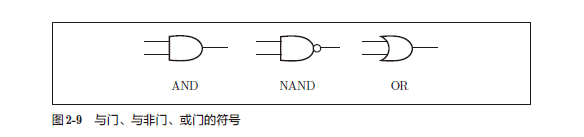

异或门的符号表示
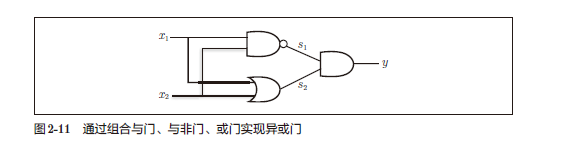

异或门的实现

In [11]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # 仅权重和偏置与AND不同！
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # 仅权重和偏置与AND不同！
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y


print XOR(0, 0)
print XOR(1, 0)
print XOR(0, 1)
print XOR(1, 1)

0
1
1
0


用感知机的表示方法（明确地显示神经元）来表示这个异或门
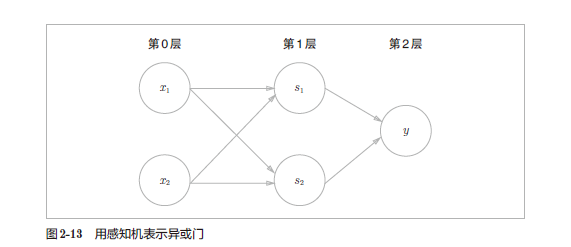

图2-13中的感知机总共由3层构成，但是因为拥有权重的层实质上只有2 层（第0 层和第1 层之间，第1 层和第2 层之间），所以称为“2 层感知机”。不过，有的文献认为图2-13 的感知机是由3 层构成的，因而将其称为“3层感知机”。



## 神经网络

关于感知机，既有好消息，也有坏消息。

好消息是，即便对于复杂的函数，感知机也隐含着能够表示它的可能性。坏消息是，设定权重的工作，即确定合适的、能符合预期的输入与输出的权重，现在还是由人工进行的。

神经网络的出现就是为了解决刚才的坏消息。具体地讲，神经网络的一个重要性质是它可以自动地从数据中学习到合适的权重参数。

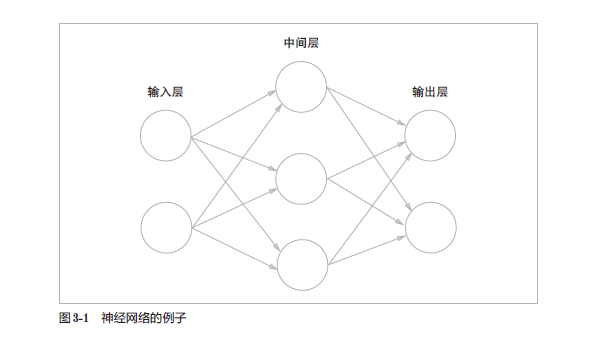

如图3-1 所示。我们把最左边的一列称为输入层，最右边的一列称为输出层，中间的一列称为中间层。中间层也称为隐藏层。
“隐藏”一词的意思是，隐藏层的神经元（和输入层、输出层不同）肉眼看不见。



明确表示出偏置b

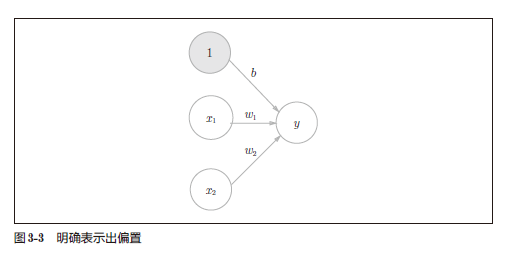


图3-3 中添加了权重为b 的输入信号1。这个感知机将x1、x2、1 三个信号作为神经元的输入，将其和各自的权重相乘后，传送至下一个神经元。在下一个神经元中，计算这些加权信号的总和。如果这个总和超过0，则输出1，否则输出0。另外，由于偏置的输入信号一直是1，所以为了区别于其他神经元，我们在图中把这个神经元整个涂成灰色。

激活函数：式（3.3）表示的激活函数以阈值为界，一旦输入超过阈值，就切换输出。这样的函数称为“阶跃函数”。因此，可以说感知机中使用了阶跃函数作为
激活函数。也就是说，在激活函数的众多候选函数中，感知机使用了阶跃函数。那么，如果感知机使用其他函数作为激活函数的话会怎么样呢？实际上，如
果将激活函数从阶跃函数换成其他函数，就可以进入神经网络的世界了。

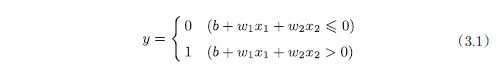

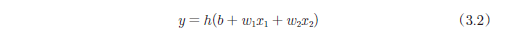

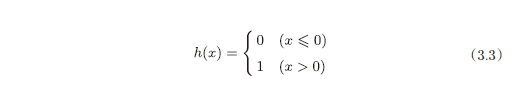

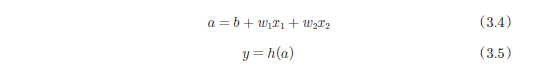

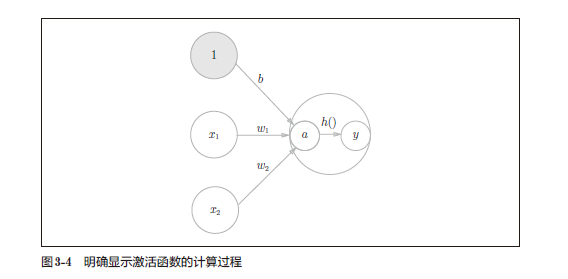

如图3-4 所示，表示神经元的○中明确显示了激活函数的计算过程，即信号的加权总和为节点a，然后节点a被激活函数h() 转换成节点y。


## 神经网络使用的激活函数

sigmoid 函数

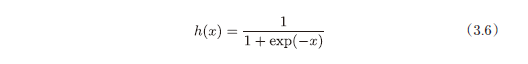

式（3.6）中的exp(−x)表示e−x 的意思。e是纳皮尔常数2.7182 . . .。式（3.6）表示的sigmoid函数看上去有些复杂，但它也仅仅是个函数而已。而函数就是给定某个输入后，会返回某个输出的转换器。比如，向sigmoid函数输入1.0或2.0后，就会有某个值被输出，类似h(1.0) = 0.731 . . .、h(2.0) = 0.880 . . .这样。



阶跃函数的实现

In [12]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

这个实现简单、易于理解，但是参数x只能接受实数（浮点数）。也就是说，允许形如step_function(3.0)的调用，但不允许参数取NumPy数组，例如step_function(np.array([1.0, 2.0]))。为了便于后面的操作，我们把它修改为支持NumPy数组的实现。为此，可以考虑下述实现。



In [13]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

x = np.array([-1.0, 1.0, 2.0])

print step_function(x)


[0 1 1]


astype()方法通过参数指定期望的类型np.int。True会转换为1，False会转换为0。这是阶跃函数的实现中所用到的NumPy的“技巧”。

阶跃函数的图形

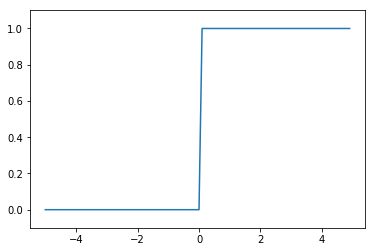

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

sigmoid 函数的实现



In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) #np.exp(-x)对应exp(−x)

sigmoid函数的图形

画图的代码和刚才的阶跃函数的代码几乎是一样的，唯一不同的地方是把输出y的函数换成了sigmoid 函数。

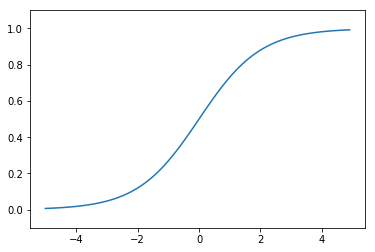

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

sigmoid 函数和阶跃函数的比较

不同点
1. 平滑性”的不同
sigmoid函数是一条平滑的曲线，输出随着输入发生连续性的变化。而阶跃函数以0为界，输出发生急剧性的变化。
sigmoid函数的平滑性对神经网络的学习具有重要意义。

2. 返回值不同
相对于阶跃函数只能返回0 或1，sigmoid 函数可以返回0.731 . . .、0.880 . . . 等实数（这一点和刚才的平滑性有关）。
也就是说，感知机中神经元之间流动的是0 或1 的二元信号，而神经网络中流动的是连续的实数值信号。


相同点
1. 相似的形状
两者的结构均是“输入小时，输出接近0（为0）；随着输入增大，输出向1 靠近（变成1）”。也就是说，当输入信号为重要信息时，阶跃函数和sigmoid函数都会输出较大的值；当输入信号为不重要的信息时，两者都输出较小的值。

2. 输出信号值
不管输入信号有多小，或者有多大，输出信号的值都在0 到1 之间。

3. 都是非线性函数
输出值是输入值的常数倍的函数称为线性函数（用数学式表示为h(x) = cx。c 为常数）。
因此，线性函数是一条笔直的直线。而非线性函数，顾名思义，指的是不像线性函数那样呈现出一条直线的函数。


为什么神经网络的激活函数必须使用非线性函数。不能使用线性函数呢？
因为使用线性函数的话，加深神经网络的层数就没有意义了。线性函数的问题在于，不管如何加深层数，总是存在与之等效的“无隐藏层的神经网络”。

为了具体地（稍微直观地）理解这一点，我们来思考下面这个简单的例子。
这里我们考虑把线性函数h(x) = cx 作为激活函数，把y(x) = h(h(h(x))) 的运算对应3 层神经网络A。
这个运算会进行y(x) = c × c × c × x 的乘法运算，但是同样的处理可以由y(x) = ax（注意，a = c的3次方）这一次乘法运算（即没有隐藏层的神经网络）来表示。如本例所示，使用线性函数时，无法发挥多层网络带来的优势。因此，为了发挥叠加层所带来的优势，激活函数必须使用非线性函数。


ReLU（Rectified Linear Unit）函数

ReLu函数表示
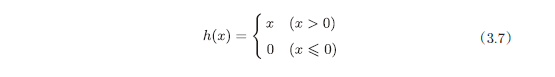

ReLU函数在输入大于0 时，直接输出该值；在输入小于等于0 时，输出0。

ReLU函数实现


In [18]:
def relu(x):
    return np.maximum(0, x)

ReLU函数的图形

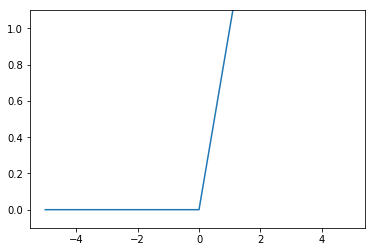

In [20]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

## 多维数组的运算


In [24]:
import numpy as np

def showArray(a):
    print "数组:", a
    print "数组的维数:", np.ndim(A)
    print "数组的形状", a.shape
    
A = np.array([1, 2, 3, 4])
showArray(A)

print "-"*10

B = np.array([[1,2], [3,4], [5,6]])
showArray(B)


数组: [1 2 3 4]
数组的维数: 1
数组的形状 (4L,)
----------
数组: [[1 2]
 [3 4]
 [5 6]]
数组的维数: 1
数组的形状 (3L, 2L)


二维数组也称为矩阵（matrix），数组的横向排列称为行（row），纵向排列称为列（column）。

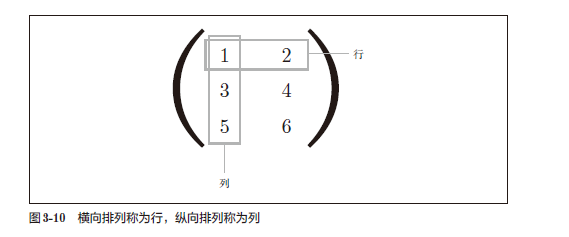

矩阵乘法

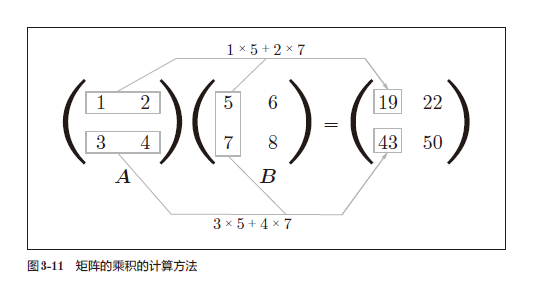

矩阵的乘积是通过左边矩阵的行（横向）和右边矩阵的列（纵向）以对应元素的方式相乘后再求和而得到的。并且，运算的结果保存为新的多维数组的元素。
比如，A的第1 行和B的第1 列的乘积结果是新数组的第1 行第1 列的元素，A的第2 行和B的第1 列的结果是新数组的第2 行第1列的元素。

矩阵乘积的代码

In [26]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

print "dot(A, B):", np.dot(A, B)
print "dot(A, B):", np.dot(B, A)

dot(A, B): [[19 22]
 [43 50]]
dot(A, B): [[23 34]
 [31 46]]


np.dot()接收两个NumPy数组作为参数，并返回数组的乘积。

这里要注意的是，np.dot(A, B) 和np.dot(B, A) 的值可能不一样。矩阵的乘积运算中，操作数（A、B）的顺序不同，结果也会不同。

另外需要注意的是，矩阵乘积对应维度个数要保持一致，不一致会导致计算出错。

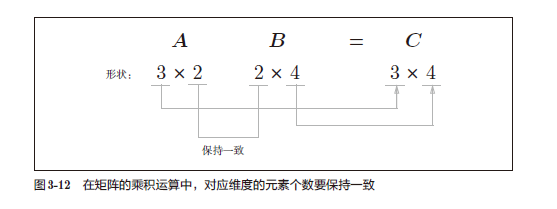


当A是二维矩阵、B是一维数组时，如图3-13 所示，对应维度的元素个数也要保持一致。
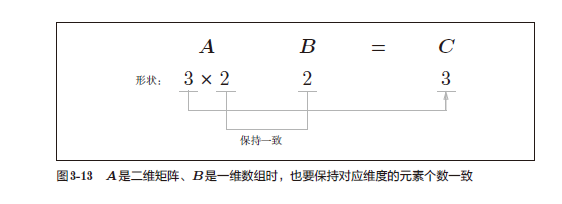



神经网络的内积

下面我们使用NumPy矩阵来实现神经网络。这里我们以图3-14 中的简单神经网络为对象。这个神经网络省略了偏置和激活函数，只有权重。

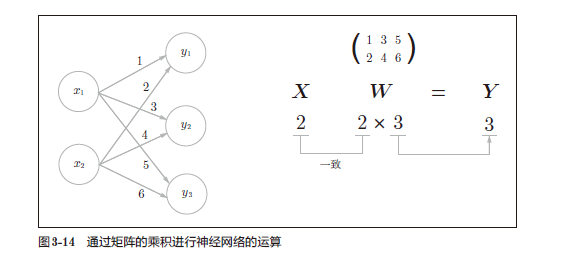

实现该神经网络时，要注意X、W、Y的形状，特别是X和W的对应维度的元素个数是否一致，这一点很重要。

代码实现

In [27]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)

print "Y:", Y

Y: [ 5 11 17]


使用np.dot（多维数组的点积），可以一次性计算出Y 的结果。
这意味着，即便Y 的元素个数为100或1000，也可以通过一次运算就计算出结果！如果不使用np.dot，就必须单独计算Y 的每一个元素（或者说必须使用for语句），非常麻烦。因此，通过矩阵的乘积一次性完成计算的技巧，在实现的层面上可以说是非常重要的。


3层神经网络的实现

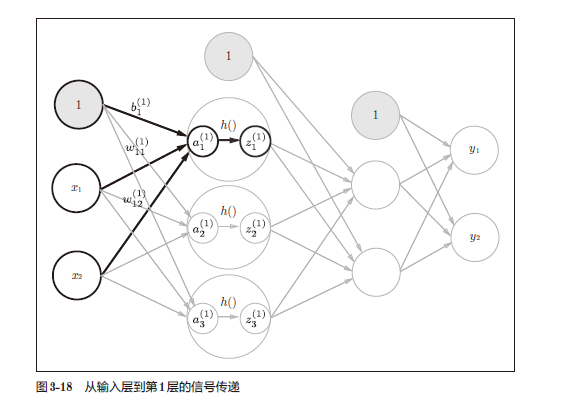

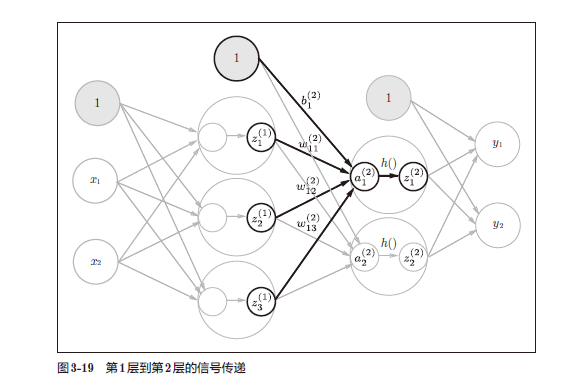

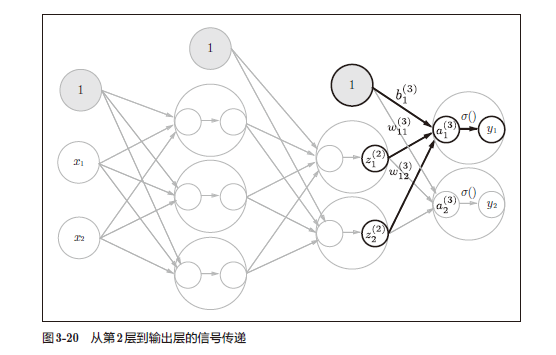


代码实现

In [28]:
#输入层到第一层
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3)
print(X.shape) # (2,)
print(B1.shape) # (3,)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(A1) # [0.3, 0.7, 1.1]
print(Z1) # [0.57444252, 0.66818777, 0.75026011]

#第一层到第二层
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

#第二层到输出层
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 或者Y = A3

print "Y:", Y


(2L, 3L)
(2L,)
(3L,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
(3L,)
(3L, 2L)
(2L,)
Y: [0.31682708 0.69627909]


重新整理下代码

In [30]:
def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

print(y) # [ 0.31682708 0.69627909]
    

[0.31682708 0.69627909]


## 输出层的设计

输出层的激活函数。一般而言，回归问题用恒等函数，分类问题用softmax函数。

恒等函数和softmax函数

恒等函数：
恒等函数会将输入按原样输出，对于输入的信息，不加以任何改动地直接输出。因此，在输出层使用恒等函数时，输入信号会原封不动地被输出。
另外，将恒等函数的处理过程用之前的神经网络图来表示的话，则如图3-21所示。

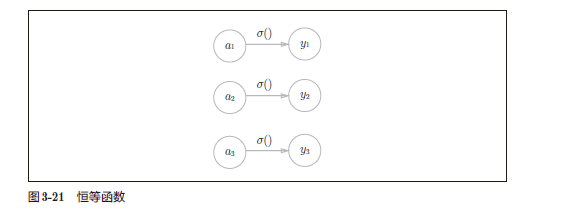

### softmax函数
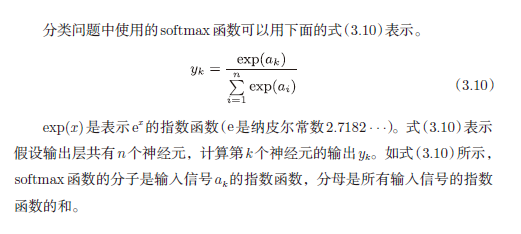

softmax函数代码实现

In [32]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3, 2.9, 4.0])
print "softmax:", softmax(a)

softmax: [0.01821127 0.24519181 0.73659691]


上面的softmax函数的实现虽然正确描述了式（3.10），但在计算机的运算上有一定的缺陷。这个缺陷就是溢出问题。

softmax 函数的实现中要进行指数函数的运算，但是此时指数函数的值很容易变得非常大。比如，e10 的值会超过20000，e100 会变成一个后面有40 多个0 的超大值，e1000 的结果会返回一个表示无穷大的inf。如果在这些超大值之间进行除法运算，结果会出现“不确定”的情况。

softmax 函数的实现改进
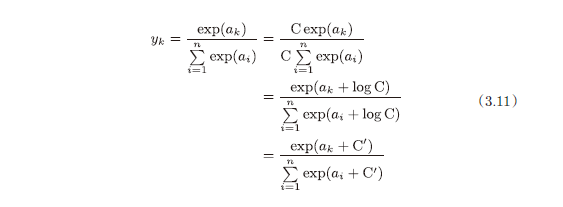

* 首先，式（3.11）在分子和分母上都乘上C这个任意的常数（因为同时对分母和分子乘以相同的常数，所以计算结果不变）。
* 然后，把这个C移动到指数函数（exp）中，记为log C。
* 最后，把log C替换为另一个符号C  。

式（3.11）说明，在进行softmax 的指数函数的运算时，加上（或者减去）某个常数并不会改变运算的结果。这里的C  可以使用任何值，但是为了防止溢出，一般会使用输入信号中的最大值。

改进前

In [34]:
a = np.array([1010, 1000, 990])
print np.exp(a) / np.sum(np.exp(a))


[nan nan nan]


D:\anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
D:\anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


改进后

In [36]:
a = np.array([1010, 1000, 990])
c = np.max(a)
print a-c
print np.exp(a - c) / np.sum(np.exp(a - c))

[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


如该例所示，通过减去输入信号中的最大值（上例中的c），我们发现原本为nan（not a number，不确定）的地方，现在被正确计算了。
综上，我们可以像下面这样实现softmax 函数。

In [37]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

softmax函数的特征

In [38]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print y
print np.sum(y)


[0.01821127 0.24519181 0.73659691]
1.0


如上所示，softmax函数的输出是0.0 到1.0之间的实数。并且，softmax函数的输出值的总和是1。
输出总和为1 是softmax 函数的一个重要性质。正因为有了这个性质，我们才可以把softmax 函数的输出解释为“概率”。

上例中a的各元素的大小关系和y的各元素的大小关系并没有改变。比如，a的最大值是第2个元素(从0开始)，y的最大值也仍是第2个元素。

一般而言，神经网络只把输出值最大的神经元所对应的类别作为识别结果。并且，即便使用softmax 函数，输出值最大的神经元的位置也不会变。因此，神经网络在进行分类时，输出层的softmax 函数可以省略。在实际的问题中，由于指数函数的运算需要一定的计算机运算量，因此输出层的softmax 函数
一般会被省略。

说明：求解机器学习问题的步骤可以分为“学习”A 和“推理”两个阶段。首先，在学习阶段进行模型的学习B，然后，在推理阶段，用学到的模型对未知的数据进行推理（分类）。如前所述，推理阶段一般会省略输出层的softmax 函数。在输出层使用softmax 函数是因为它和神经网络的学习有关系。


输出层的神经元数量

输出层的神经元数量需要根据待解决的问题来决定。对于分类问题，输出层的神经元数量一般设定为类别的数量。比如，对于某个输入图像，预测是图中的数字0 到9 中的哪一个的问题（10 类别分类问题），可以像图3-23 这样，将输出层的神经元设定为10 个。

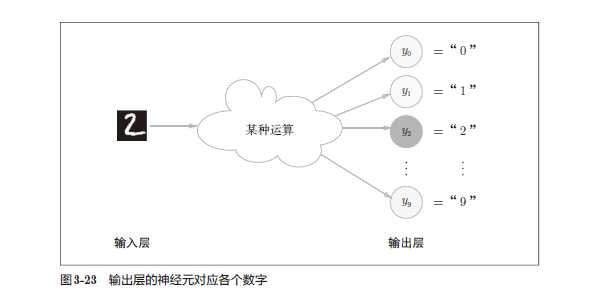

